In [233]:
print("ASSIGNMENT 3")
import numpy as np 
import matplotlib.pyplot as plt
import math

ASSIGNMENT 3


QUESTION NO 1

We know that pbbility of acceptance in this method is 1/c.
So on avg on c attempts i get one acceptable value .
Now for the second part value of c is 2.109375 
if we differentiate f(x) we get 20*((1-x)^2)(1-4x) which has value zero at 1/4 which is also the local maxima where value of f(x) is  2.109375 .
To calculate P( 0.25=< X <= 0.75) we have to intigrate f(x) from 0.25 to 0.75 which gives 0.617188

In [234]:
def genrand(N,a0,b0,m0,seed):
    ret=np.zeros(N)
    x=seed
    for i in range(N):
        ret[i]=(x/m0)
        x=(a0*x+b0)%m0
    return ret
def f(x):
    if(x>=0 and x<=1):
        return 20*x*((1-x)**3)
    else:
        return 0
def g(x):
    if(x>=0 and x<=1):
        return 1
    else:
        return 0
c=2.109375
list=[]


In [235]:
def generate(N,a,b,m,A,B,M,c,seed,SEED):
    xi=seed
    XI=SEED
    ret=np.zeros(N)
    i=0
    total_it=0

    while(i<N):
        total_it+=1
        u1=xi/m 
        u2=XI/M
        if(u2*c <= f(u1)):
            ret[i]=u1
            i+=1
            list.append(total_it)
            total_it=0
        xi=(a*xi+b)%m
        XI=(A*XI+B)%M 
    return ret
        



In [236]:

Y=generate(10000,1229,891,244944,2555,135,54345,2.109375,1,1)

In [237]:
def doitall(Y,theo):
    X=[i for i in range(100)]
    calc_mean=Y.mean()
    print("Calculated mean is "+str(calc_mean))
    print("Theoretical mean is "+str(theo))
    cnt=0
    for i in range(10000):
        if(Y[i]>=0.25 and Y[i]<=0.75):
            cnt+=1
    prob=cnt/10000
    print("calculated probability  to be between 0.25 to 0.75 is "+str(prob))
    print("Theoretically is should be 0.617188" )
    arr1=np.sort(Y)
    freq=np.zeros(100)
    act_func=np.zeros(100)
    ind=0
    cnt=0
    for i in range(100):
        while(ind<10000 and arr1[ind]<(i+1)/100):
            ind+=1
            cnt+=1
        prob=cnt/10000
        freq[i]=prob*100
        act_func[i]=f(i/100)
        cnt=0
    plt.plot(X,act_func)
    plt.bar(X,freq)
    l=np.array(list)
    print("mean of iteration for each element is "+str(l.mean()))

Calculated mean is 0.3343714248971193
Theoretical mean is 0.33333
calculated probability  to be between 0.25 to 0.75 is 0.618
Theoretically is should be 0.617188
mean of iteration for each element is 2.086


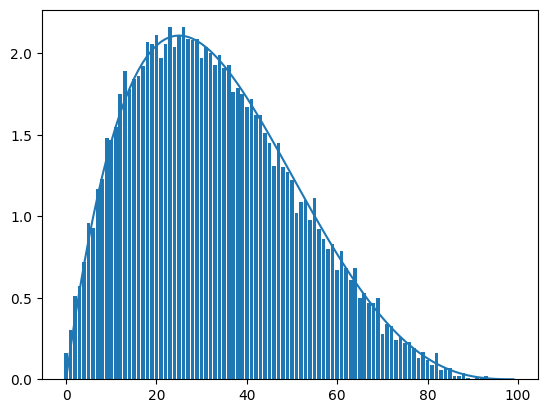

In [238]:
doitall(Y,0.33333)

In [239]:
list=[] # reinitializee list 
Y1=generate(10000,1229,891,244944,2555,135,54345,4,1,1)

Calculated mean is 0.33704085913514925
Theoretical mean is 0.33333
calculated probability  to be between 0.25 to 0.75 is 0.6227
Theoretically is should be 0.617188
mean of iteration for each element is 3.9451


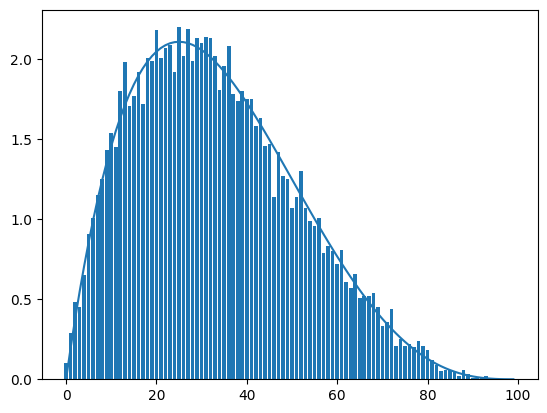

In [240]:
doitall(Y1,0.33333)

In [241]:
list=[]
Y2=generate(10000,1229,891,244944,2555,135,54345,5,1,1)

Calculated mean is 0.33907177926383175
Theoretical mean is 0.333333
calculated probability  to be between 0.25 to 0.75 is 0.6249
Theoretically is should be 0.617188
mean of iteration for each element is 4.9511


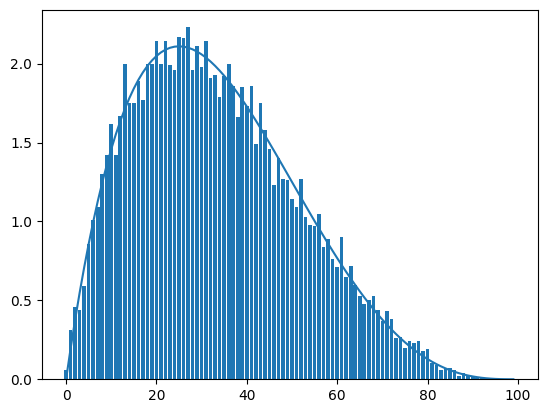

In [242]:
doitall(Y2,0.333333)

OBSERVATION IS THAT UPON INCREASING NO OF ITERATION TO GET EACH ELEMENT IS INCREASING also bar plot and the plot of pdf becomes more and more different in subsequent cases

Question 2

Let us assume that for f(x) = cons*x^(alpha-1)*exp(-x) for some value cons.Now for 0< x <1 ,f(x)<=(cons/alpha )*(alpha* x^(alpha-1)) we can assume g(x) to be alpha*x^(alpha-1) and c= cons/alpha 
that gives f(x)/cg(x) = e(-x) 

In [243]:
#for alpha=0.7
list=[]
def generategamma(N,a,b,m,A,B,M,alpha,seed,SEED):
    xi=seed
    XI=SEED
    ret=np.zeros(N)
    i=0
    no_it=0
    while(i<N):
        no_it+=1
        u1=xi/m 
        x= u1**(1/alpha)
        u2=XI/M
        if(u2 <= math.e**(-1*x)):
            ret[i]=x
            i+=1
            list.append(no_it)
            no_it=0
        xi=(a*xi+b)%m
        XI=(A*XI+B)%M 
    return ret

In [244]:
Y4=generategamma(10000,1229,891,244944,2555,135,54345,0.7,1,1)

In [245]:
Y4

array([2.00139649e-08, 1.13042436e-03, 5.29388125e-01, ...,
       1.88961898e-02, 6.59632710e-02, 1.47438820e-01])

In [246]:
arr=np.array(list)

In [247]:
rejection_constant=arr.mean()

In [248]:
rejection_constant

1.4359

REJECTION CONSTANT IS BASICALLY THE VALUE OF C WHICH IS THE AVG NO OF ITERATION SO REJECTION CONST IS 1.43 AND g(x) is basically alpha*x^(alpha-1)


In [249]:
Y5=generategamma(10000,1229,891,244944,2555,135,54345,3,1,1)

In [250]:
Y5

array([0.01598249, 0.20531611, 0.73726825, ..., 0.80499891, 0.49506322,
       0.47154232])

In [251]:
Y6=generategamma(10000,1229,891,244944,2555,135,54345,3.7,1,1)

In [252]:
Y6

array([0.03495389, 0.27701619, 0.78103294, ..., 0.68753754, 0.71815992,
       0.45886207])

Short Explaination about why the same function works for all values of alpha: Basically here we are only concerned with what happens in (0,1) interval not outside that and the chosen g(x) satisfies all the properties for all values of alpha if the range was 0 to infinity this approach have not had worked . To show that it works well we can plot the Pdf calculated from the sample and the theoretical one for Y=5 
Remember the below function works only for alpha=3 because the values of the proportionality  constant in the equation  is hardcoded in the function(calculating value of intigration of x^(alpha-1) * exp(-x))

In [253]:
def plotforalpha3(arr,alpha):
    X=[(i+1)/100 for i in range(100)]
    Y=[gp(X[i],alpha) for i in range(100)]
    plt.plot(X,Y)
    arr1=np.sort(arr)
    freq=np.zeros(100)
    ind=0
    cnt=0
    for i in range(100):
        while(ind<10000 and arr1[ind]<(i+1)/100):
            ind+=1
            cnt+=1
        prob=cnt/10000
        freq[i]=prob*100*0.16
        cnt=0
    plt.plot(X,freq)


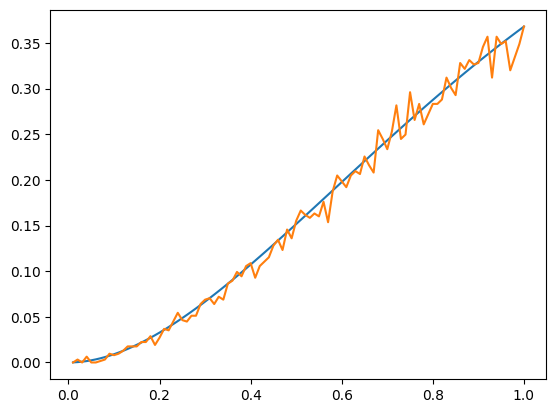

In [254]:
plotforalpha3(Y5,3)

In [255]:
print(Y4.mean())
print(Y5.mean())
print(Y6.mean())


0.3280812506609488
0.709813119498576
0.7560017830057963
